Impotación de bibliotecas

In [47]:
import pandas as pd
import numpy as np
import csv
import os
import re
import matplotlib.pyplot as plt

Fórmula para que muestre todas las columnas de las tablas

In [ ]:
pd.set_option('display.max.columns', None)

Limpieza de archivos

In [50]:
# Limpieza del archivo en formato .csv

ruta_origen = r"C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Originales\bank-additional.csv"
carpeta_destino = r"C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Nuevos"
os.makedirs(carpeta_destino, exist_ok=True)
ruta_salida = os.path.join(carpeta_destino, "datos-banco.csv")

banco = pd.read_csv(
    ruta_origen,
    sep=",",
    quotechar='"',
    doublequote=True,
    engine="python",
    dtype=str,
    keep_default_na=False
)

if banco.columns[0] == "Unnamed: 0":
    banco = banco.drop(columns=[banco.columns[0]])

def es_enumeracion(col_serie: pd.Series) -> bool:
    vals = col_serie.astype(str).str.strip()
    if not np.all(vals.str.match(r"^[+-]?\d+$", na=False)):
        return False
    arr = vals.astype(int).to_numpy()
    n = len(arr)
    return np.array_equal(arr, np.arange(n)) or np.array_equal(arr, np.arange(1, n + 1))

candidatas = [c for c in banco.columns if c.lower().startswith("unnamed") or c.lower() in {"index", "enumeration", "enumerador", "fila", "row"}]
a_eliminar = set()
for c in candidatas:
    if es_enumeracion(banco[c]):
        a_eliminar.add(c)

if not a_eliminar:
    primera_col = banco.columns[0]
    if es_enumeracion(banco[primera_col]):
        a_eliminar.add(primera_col)

if a_eliminar:
    banco = banco.drop(columns=list(a_eliminar))

cols_booleanas = ["default", "housing", "loan", "e", "y"]
patron_cero = re.compile(r"^[\s\+\-]*0[\s]*(?:[.,][\s]*0+)?[\s]*$", flags=re.UNICODE)
patron_uno = re.compile(r"^[\s\+\-]*1[\s]*(?:[.,][\s]*0+)?[\s]*$", flags=re.UNICODE)

def mapear_no_si_num(val):
    s = "" if val is None else str(val)
    if patron_cero.match(s):
        return "No"
    if patron_uno.match(s):
        return "Sí"
    return s

for col in cols_booleanas:
    if col in banco.columns:
        banco[col] = banco[col].apply(mapear_no_si_num)

if "y" in banco.columns:
    def normaliza_y(v):
        if v is None:
            return v
        s = str(v).strip().lower()
        s_sin_tilde = s.replace("í", "i")
        if s_sin_tilde == "no":
            return "No"
        if s_sin_tilde == "si":
            return "Sí"
        return v
    banco["y"] = banco["y"].apply(normaliza_y)

for col_drop in ["latitude", "longitude"]:
    if col_drop in banco.columns:
        banco = banco.drop(columns=[col_drop])

if "y" in banco.columns:
    banco = banco.rename(columns={"y": "subscription"})

banco.columns = [col.strip().capitalize() for col in banco.columns]

columnas_formato = ["Job", "Marital status", "Contact", "Poutcome"]

for col in columnas_formato:
    if col in banco.columns:
        banco[col] = banco[col].astype(str).apply(
            lambda x: x.capitalize() if x.strip() != "" else x
        )

banco.replace('', 'Not Specified', inplace=True)
banco.replace(r'^\s*$', 'Not Specified', regex=True, inplace=True)
banco.fillna('Not Specified', inplace=True)

# --- Conversión de columna Age a entero y reemplazo de 0 ---
if "Age" in banco.columns:
    banco["Age"] = pd.to_numeric(banco["Age"], errors="coerce").fillna(0).astype(int)
    banco["Age"] = banco["Age"].replace(0, "Not Specified")

banco.to_csv(
    ruta_salida,
    sep=",",
    index=False,
    quoting=csv.QUOTE_MINIMAL,
    encoding="utf-8-sig"
)

print(f"Archivo guardado en: {ruta_salida}")

Archivo guardado en: C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Nuevos\datos-banco.csv


In [51]:
# Limpieza del archivo en formato .xlsx

ruta_origen = r"C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Originales\bank-additional.csv"
carpeta_destino = r"C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Nuevos"
os.makedirs(carpeta_destino, exist_ok=True)
ruta_salida = os.path.join(carpeta_destino, "datos-banco.csv")

banco = pd.read_csv(
    ruta_origen,
    sep=",",
    quotechar='"',
    doublequote=True,
    engine="python",
    dtype=str,
    keep_default_na=False
)

if banco.columns[0] == "Unnamed: 0":
    banco = banco.drop(columns=[banco.columns[0]])

def es_enumeracion(col_serie: pd.Series) -> bool:
    vals = col_serie.astype(str).str.strip()
    if not np.all(vals.str.match(r"^[+-]?\d+$", na=False)):
        return False
    arr = vals.astype(int).to_numpy()
    n = len(arr)
    return np.array_equal(arr, np.arange(n)) or np.array_equal(arr, np.arange(1, n + 1))

candidatas = [c for c in banco.columns if c.lower().startswith("unnamed") or c.lower() in {"index", "enumeration", "enumerador", "fila", "row"}]
a_eliminar = set()
for c in candidatas:
    if es_enumeracion(banco[c]):
        a_eliminar.add(c)

if not a_eliminar:
    primera_col = banco.columns[0]
    if es_enumeracion(banco[primera_col]):
        a_eliminar.add(primera_col)

if a_eliminar:
    banco = banco.drop(columns=list(a_eliminar))

cols_booleanas = ["default", "housing", "loan", "e", "y"]
patron_cero = re.compile(r"^[\s\+\-]*0[\s]*(?:[.,][\s]*0+)?[\s]*$", flags=re.UNICODE)
patron_uno = re.compile(r"^[\s\+\-]*1[\s]*(?:[.,][\s]*0+)?[\s]*$", flags=re.UNICODE)

def mapear_no_si_num(val):
    s = "" if val is None else str(val)
    if patron_cero.match(s):
        return "No"
    if patron_uno.match(s):
        return "Sí"
    return s

for col in cols_booleanas:
    if col in banco.columns:
        banco[col] = banco[col].apply(mapear_no_si_num)

if "y" in banco.columns:
    def normaliza_y(v):
        if v is None:
            return v
        s = str(v).strip().lower()
        s_sin_tilde = s.replace("í", "i")
        if s_sin_tilde == "no":
            return "No"
        if s_sin_tilde == "si":
            return "Sí"
        return v
    banco["y"] = banco["y"].apply(normaliza_y)

for col_drop in ["latitude", "longitude"]:
    if col_drop in banco.columns:
        banco = banco.drop(columns=[col_drop])
if "y" in banco.columns:
    banco = banco.rename(columns={"y": "subscription"})

banco.columns = [col.strip().capitalize() for col in banco.columns]
banco.replace('', 'Not Specified', inplace=True)
banco.replace(r'^\s*$', 'Not Specified', regex=True, inplace=True)
banco.fillna('Not Specified', inplace=True)

banco.to_csv(
    ruta_salida,
    sep=",",
    index=False,
    quoting=csv.QUOTE_MINIMAL,
    encoding="utf-8-sig"
)

print(f"Archivo guardado en: {ruta_salida}")

Archivo guardado en: C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Nuevos\datos-banco.csv


Análisis de los datos

1. Variables estadísticas

In [ ]:
# Variables estadísticas utilizando la columna Age del archivo datos-banco

age = pd.to_numeric(banco["Age"], errors="coerce")

minimo  = int(age.min())
maximo  = int(age.max())
media   = round(age.mean(), 2)
mediana = int(age.median())
std   = round(age.std(ddof=1), 2)

print("La edad mínima de los trabajadores del banco es:", minimo)
print("La edad máxima de los trabajadores del banco es:", maximo)
print("La edad media de los trabajadores del banco es:", media)
print("La mediana en la edad de los trabajadores del banco es:", mediana)
print("La desviación estandar en la edad de los trabajadores del banco es:", std)

La edad mínima de los trabajadores del banco es: 17
La edad máxima de los trabajadores del banco es: 98
La edad media de los trabajadores del banco es: 39.98
La mediana en la edad de los trabajadores del banco es: 38
La desviación estandar en la edad de los trabajadores del banco es: 10.44


2. Gráficos

In [62]:
excel = r"C:\Users\gonza\OneDrive\Documentos\Data Analisis\3. Python\2. Python for data\Entrega\Nuevos\datos-banco.csv"

archivo = pd.read_csv(excel)

cols_lower = {c.lower(): c for c in archivo.columns}

def pick_col(options):
    for o in options:
        col = cols_lower.get(o.lower())
        if col is not None:
            return col
    raise ValueError(f"No se encontró ninguna de las columnas {options}. Columnas disponibles: {list(archivo.columns)}")


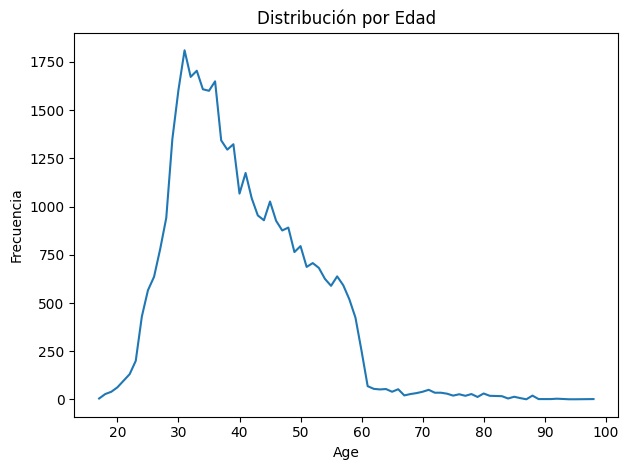

In [63]:
# 1. Gráfico lineal por Edad

age_col = pick_col(["Age", "age"])

age_series = pd.to_numeric(archivo[age_col], errors="coerce").dropna().astype(int)
age_counts = age_series.value_counts().sort_index()  

plt.figure()
plt.plot(age_counts.index, age_counts.values)
plt.title("Distribución por Edad")
plt.xlabel(age_col)
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

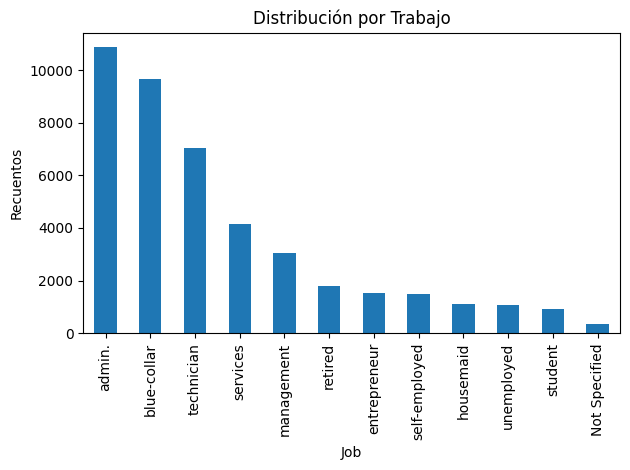

In [ ]:
# Gráfico de barras por Profesión

job_col = pick_col(["Job", "job"])

job_counts = archivo[job_col].astype(str).value_counts().sort_values(ascending=False)

plt.figure()
job_counts.plot(kind="bar")
plt.title("Distribución por Trabajo")
plt.xlabel(job_col)
plt.ylabel("Recuentos")
plt.tight_layout()
plt.show()

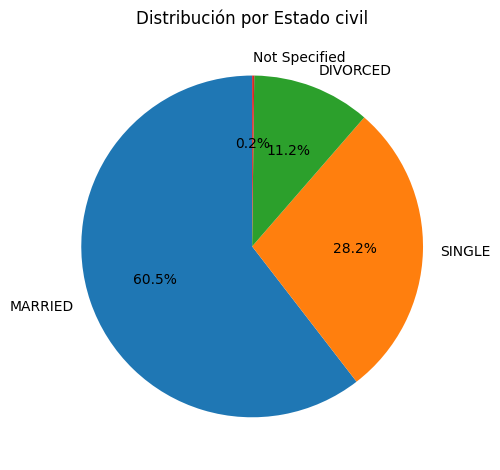

In [ ]:
# Gráfico circular por Estado civil

marital_col = pick_col(["Marital status", "marital status", "Marital", "marital", "Marital_Status", "marital_status"])

marital_counts = archivo[marital_col].astype(str).value_counts()

plt.figure()
plt.pie(marital_counts.values, labels=marital_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución por Estado civil")
plt.tight_layout()
plt.show()